## Assigment 4: heat equation via linear system solve

The heat equation 
$$
\frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}=0
$$
can be discretized by central difference as:
$$
\frac{\partial^2 f}{\partial x^2}\approx\frac{f_{i+1,j}-2f_{i,j}+f_{i-1,j}}{\Delta x^2}.
$$
$$
\frac{\partial^2 f}{\partial y^2}\approx\frac{f_{i,j+1}-2f_{i,j}+f_{i,j-1}}{\Delta y^2}.
$$

Using this discretization (assuming $\Delta x = \Delta y$) we can build a $(n-2)^2\times (n-2)^2$ matrix $A$ where each row of $A$ correspond to the discretization in a particular point of the domain. For instance, assuming a $5\times 5$ grid, the discretization in the point $(1,1)$ and $(2,3)$ will be respectivelly:

![alt text](grid.png)

$$
-4f_{1,1}+f_{1,2}+f{2,1}=-(b[0,1]+b[3,1])
$$
and
$$
-4f_{2,3}+f_{3,3}+f_{1,3}+f_{2,4}+f_{2,2}=0
$$

In matrix form $Af=y$:
$$
    \left[\begin{array}{cccccccccccc}
    -4 & 1 & 0 & 0 & 1 & \cdots & 0 & 0 & 0 & 0 & 0 & 0  \\
    \vdots \\
    0 & 0 & 1 & 0 & \ldots & 1 & -4 & 1 & 0 & \ldots & 1 & 0 \\
    \vdots
    \end{array}\right]
    \left[\begin{array}{c} f_{1,1} \\  f_{1,2} \\ \vdots \\ f_{4,4} \end{array}\right]=
     \left[\begin{array}{c} -(b[0,1]+b[3,1]) \\  \vdots \\ 0 \\ \vdots \\ -(b[1,4]+b[2,4]) \end{array}\right]
$$

Assuming the heat equation is defined in a square $[0,1]\times[0,1]$ regular domain, write a code to build the matrix A and vector y such that the solution of:
$$
Af=y
$$
gives the values of f in each point of the grid.

Essentially you have to fill up the funciton __build_matrix_and_vector(m,b)__ below.

In [1]:
%load_ext line_profiler

In [5]:
import numpy as np
import scipy.sparse as ss
import scipy.sparse.linalg as ssl

def set_boundary_values(n):
    b = np.zeros((4,n))
    b[2]=0
    b[3]=0
    return(b)

def insert_grid_values(i, j, G):
    G[i,j] = -4
    G[i+1,j] = 1
    G[i-1,j] = 1
    G[i,j+1] = 1
    G[i,j-1] = 1
    
def form_point_vector(G,n):
    G = G[1:n-1,1:n-1]
    G = np.reshape(G, (1,(n-2)*(n-2)))
    return G
    
def form_y_point(G, n):
    point_array = np.zeros((2,n))
    point_array[0,:] = G[:,0]
    point_array[1,:] = G[:,n-1]
    return np.sum(point_array)
    
def build_matrix_and_vector(n,b):
    M = np.zeros(((n-2)*(n-2),(n-2)*(n-2)))
    M_insert_index = 0
    y = []
    for i in range(1, n-1):
        for j in range(1, n-1):
            G = build_grid(n)
            set_boundary_grid(G,b)
            insert_grid_values(i, j, G)
            point_sum = form_y_point(G, n)
            y.append(-point_sum)
            G = form_point_vector(G,n)
            M[M_insert_index,:] = G
            M_insert_index += 1

    #return(M,y)  # not sparce
    return(ss.csr_matrix(M),y)

def build_grid(n):
    '''defines the grid'''
    G = np.zeros((n,n))
    return(G)

def set_boundary_grid(G,b):
    '''set the boundary values: b[0]=botton, b[1]=top, b[2]=left, b[3]=right'''

    G[0,:]=b[0]
    G[-1,:]=b[1]
    G[:,0]=b[2]
    G[:,-1]=b[3]
    
def solve_heat_equation(n):
    b = set_boundary_values(n)
    M,y = build_matrix_and_vector(n,b)
    #f = np.linalg.solve(M,y)        # not sparse
    f = ssl.spsolve(M,y)
    G = np.zeros((n,n)) 
    G[1:n-1,1:n-1]=f.reshape(n-2,n-2) 

    return(G)

In [6]:
G = solve_heat_equation(100)

In [7]:
%prun G = solve_heat_equation(100)

In [5]:
n = 100
b = set_boundary_values(n)
#%lprun -f build_matrix_and_vector build_matrix_and_vector(n,b)
#%lprun -f form_y_point form_y_point(G,n)
%lprun -f solve_heat_equation solve_heat_equation(100)

Your solution should result in an image like this:

![image](solution.png)

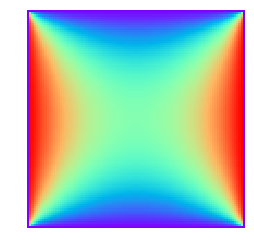

In [6]:
import matplotlib.pyplot as plt

img=plt.imshow(G)
img.set_cmap('rainbow')
plt.axis('off')
plt.show()

Profile our code and compare it with the code done in class. Is your code quicker? If not, why?
The code is not quicker. I did not implement iterators for my code.

Hint: the sparce solver __spsolve__ might be using a much more error threshold.

Can you implement the function __build_matrix_and_vector__ without using any __if__ statement condition?

I attempted to code it without any If statements. Please give feedback on the implementation.